In [3]:
%matplotlib notebook
import numpy as np
import os
import sys
from matplotlib import pyplot as plt

#Path to the scripts shared troughout phases
parent_path = os.path.abspath('')
path_common =  '/'.join(parent_path.split('/')[:-1])
save_path = os.path.join(parent_path, 'Results')
if(not os.path.exists(save_path)):
    os.makedirs(save_path)

C:\Users\vbenc\Projects\Honours\Honours\Phases\Phase3\Experiment - Connectivity


In [20]:
def extract(folder_name):
    basis_path = os.path.join(parent_path, folder_name)
    losses_tr = []
    losses_te = []
    losses_va = []
    iterations = []
    
    for folder in os.listdir(basis_path):
        if not folder == ".ipynb_checkpoints" and not folder == "Training.ipynb":
            path_to_saves = os.path.join(basis_path, folder,'Saves')
            losses_tr.append(np.load(os.path.join(path_to_saves,'losses_tr.npy')))
            losses_te.append(np.load(os.path.join(path_to_saves,'losses_te.npy')))
            losses_va.append(np.load(os.path.join(path_to_saves,'losses_va.npy')))
            iterations.append(np.load(os.path.join(path_to_saves,'iterations.npy')))
    
    
    losses_te = np.array(losses_te)
    losses_tr = np.array(losses_tr)
    losses_va = np.array(losses_va)
    iterations = np.array(iterations)
    
    return losses_tr, losses_te, losses_va, iterations

In [21]:
losses_tr_two, losses_te_two, losses_va_two, iterations_two = extract('Option - 2NearestNeighbourgh')
losses_tr_all, losses_te_all, losses_va_all, iterations_all = extract('Option - FullyConnected')

<IPython.core.display.Javascript object>


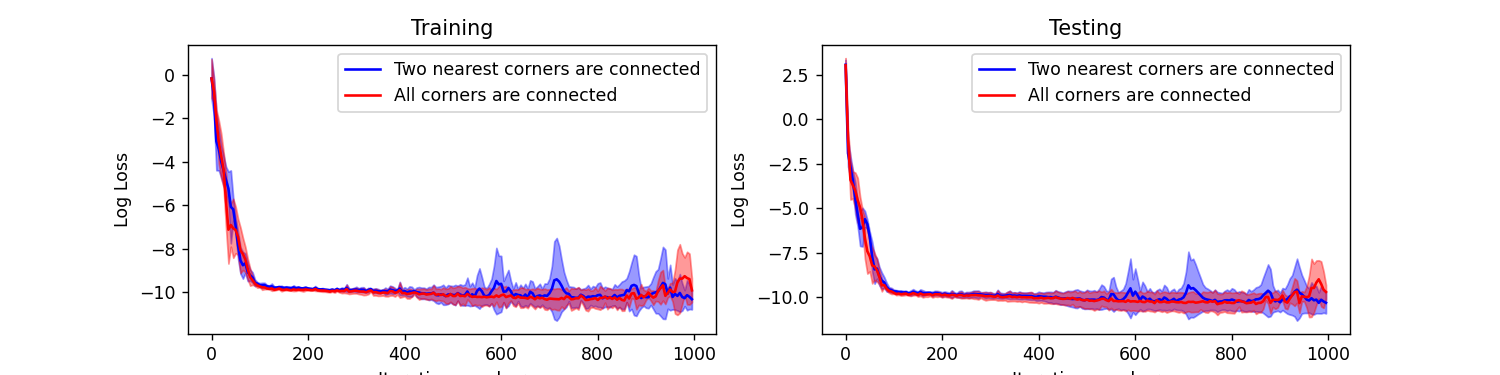

In [32]:
x = iterations_two[0]
y1 = np.mean(np.log(losses_tr_two),axis=0)
e1 = np.std(np.log(losses_tr_two),axis=0)
y2 = np.mean(np.log(losses_tr_all),axis=0)
e2 = np.std(np.log(losses_tr_all),axis=0)

plt.close('all')
fig = plt.figure(1, figsize=(12, 3))
fig.clf()
ax = fig.add_subplot(1, 2, 1)
ax.plot(x, y1, "b",label = "Two nearest corners are connected")
plt.fill_between(x, y1-e1, y1+e1, color = "b", alpha=0.4)
ax.plot(x, y2, "r",label = "All corners are connected")
plt.fill_between(x, y2-e2, y2+e2, color = "r", alpha=0.4)
ax.legend()
ax.set_title("Training")
ax.set_xlabel("Iteration number")
ax.set_ylabel("Log Loss")


x = iterations_two[0]
y1 = np.mean(np.log(losses_te_two),axis=0)
e1 = np.std(np.log(losses_te_two),axis=0)
y2 = np.mean(np.log(losses_te_all),axis=0)
e2 = np.std(np.log(losses_te_all),axis=0)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x, y1, "b",label = "Two nearest corners are connected")
plt.fill_between(x, y1-e1, y1+e1, color = "b", alpha=0.4)
ax.plot(x, y2, "r",label = "All corners are connected")
plt.fill_between(x, y2-e2, y2+e2, color = "r", alpha=0.4)
ax.legend()
ax.set_title("Testing")
ax.set_xlabel("Iteration number")
ax.set_ylabel("Log Loss")



plt.show()